## Data Analysis 
- Exploration




In [1]:
import pandas as pd
import warnings
import mariadb
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
username = 'cip_user'
password = 'cip_pw'
database_name = 'CIP'

conn = mariadb.connect(
        user=username,
        password=password,
        host="localhost",
        port=3306,
        database=database_name
    )
mycursor = conn.cursor()

df = pd.read_sql_query("""SELECT 
                                resort,location_key,first_rental_day,return_date,gear_name,price,rental_duration,price_per_day,gear_class
                       
                                 FROM merged;""", conn)
conn.close()

In [3]:
#df = pd.read_csv("../Data/gears_stage3.csv", sep=',')
#df.columns

df

,resort,location_key,first_rental_day,return_date,gear_name,price,rental_duration,price_per_day,gear_class
0,Grimentz-Zinal /Anniviers,Grimentz,2023-12-15,2023-12-15,Ski Exclusive,49.5,1.0,49.5,ski
1,Grimentz-Zinal /Anniviers,Grimentz,2023-12-15,2023-12-15,Ski Exclusive,49.5,1.0,49.5,ski
2,Grimentz-Zinal /Anniviers,Grimentz,2023-12-15,2023-12-15,Ski Exclusive,49.5,1.0,49.5,ski
3,Grimentz-Zinal /Anniviers,Grimentz,2023-12-15,2023-12-15,Ski Exclusive,49.5,1.0,49.5,ski
4,Grimentz-Zinal /Anniviers,Grimentz,2023-12-15,2023-12-15,Ski Exclusive,49.5,1.0,49.5,ski
...,...,...,...,...,...,...,...,...,...
86299,Obermutten,Obermutten,None,None,None,NaN,NaN,NaN,None
86300,Obermutten,Obermutten,None,None,None,NaN,NaN,NaN,None
86301,Obermutten,Obermutten,None,None,None,NaN,NaN,NaN,None
86302,Obermutten,Obermutten,None,None,None,NaN,NaN,NaN,None


In [4]:
df.head(4)

,resort,location_key,first_rental_day,return_date,gear_name,price,rental_duration,price_per_day,gear_class
0,Grimentz-Zinal /Anniviers,Grimentz,2023-12-15,2023-12-15,Ski Exclusive,49.5,1.0,49.5,ski
1,Grimentz-Zinal /Anniviers,Grimentz,2023-12-15,2023-12-15,Ski Exclusive,49.5,1.0,49.5,ski
2,Grimentz-Zinal /Anniviers,Grimentz,2023-12-15,2023-12-15,Ski Exclusive,49.5,1.0,49.5,ski
3,Grimentz-Zinal /Anniviers,Grimentz,2023-12-15,2023-12-15,Ski Exclusive,49.5,1.0,49.5,ski


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86304 entries, 0 to 86303
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   resort            86304 non-null  object 
 1   location_key      86304 non-null  object 
 2   first_rental_day  80419 non-null  object 
 3   return_date       80419 non-null  object 
 4   gear_name         80419 non-null  object 
 5   price             80419 non-null  float64
 6   rental_duration   80419 non-null  float64
 7   price_per_day     80419 non-null  float64
 8   gear_class        80419 non-null  object 
dtypes: float64(3), object(6)
memory usage: 5.9+ MB


In [6]:
df['first_rental_day'] = pd.to_datetime(df['first_rental_day'])
df['return_date'] = pd.to_datetime(df['return_date'])


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86304 entries, 0 to 86303
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   resort            86304 non-null  object        
 1   location_key      86304 non-null  object        
 2   first_rental_day  80419 non-null  datetime64[ns]
 3   return_date       80419 non-null  datetime64[ns]
 4   gear_name         80419 non-null  object        
 5   price             80419 non-null  float64       
 6   rental_duration   80419 non-null  float64       
 7   price_per_day     80419 non-null  float64       
 8   gear_class        80419 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 5.9+ MB


## How many Resorts with an Intersport in town?

In [8]:
filtered_df = df[df['rental_duration'].notnull()]
s=f"""Number of Resorts with an Intersport in town: {len(filtered_df['resort'].unique())} """
print(s)

Number of Resorts with an Intersport in town: 45 


## Most Expansive and Cheapest Location (based on renting Ski Premium)

In [10]:
product = "ski premium"
df_selection = df[['location_key', 'price_per_day']][df['gear_name'].str.lower() == product]
df_prices = df_selection.groupby('location_key')['price_per_day'].mean().reset_index()
most_expensive = df_prices.loc[df_prices['price_per_day'].idxmax()].location_key
cheapest = df_prices.loc[df_prices['price_per_day'].idxmin()].location_key

print(f"most_expensive:{most_expensive} cheapest:{cheapest}")

most_expensive:Sils i.E. cheapest:La Dôle


Text(0.5, 1.0, 'product:ski premium -- most exp:Sils i.E.;cheapest:La Dôle')

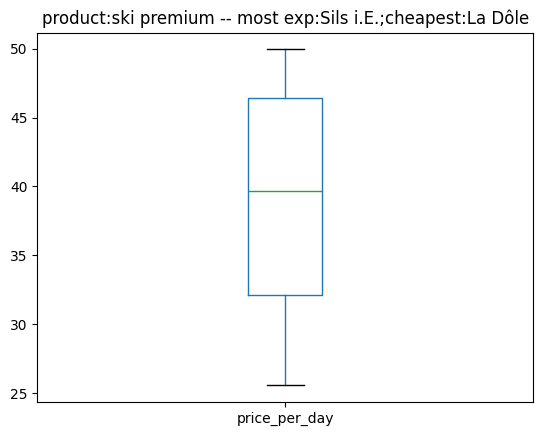

In [11]:
df_prices.boxplot(column='price_per_day', grid=False).set_title(f"product:{product} -- most exp:{most_expensive};cheapest:{cheapest}")

## Difference in price between Ski Premium and Ski Economy

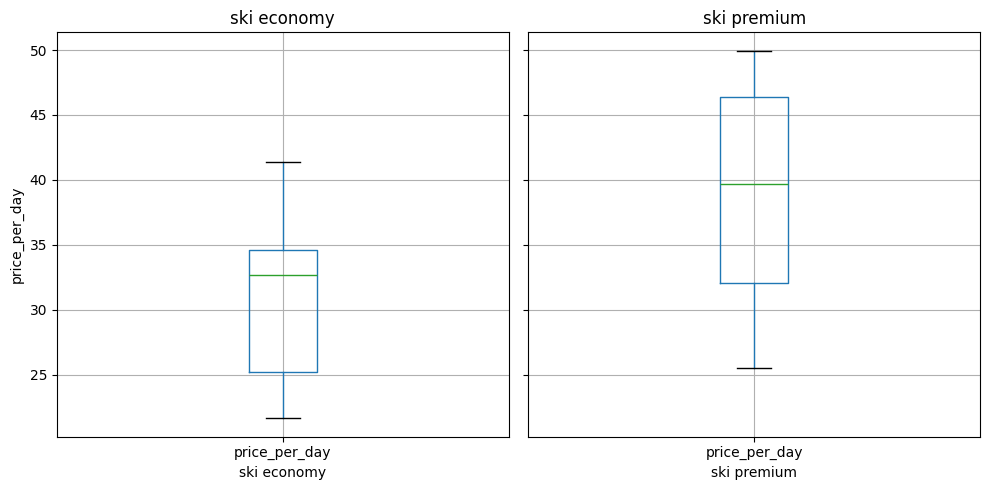

In [12]:
product1 = "ski economy"
df_selection = df[['location_key', 'price_per_day']][df['gear_name'].str.lower() == product1]
df_econ = df_selection.groupby('location_key')['price_per_day'].mean().reset_index()

product2 = "ski premium"
df_selection = df[['location_key', 'price_per_day']][df['gear_name'].str.lower() == product2]
df_prem = df_selection.groupby('location_key')['price_per_day'].mean().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)
df_econ.boxplot(column='price_per_day', ax=axes[0])
axes[0].set_title(product1)
axes[0].set_xlabel(product1)
axes[0].set_ylabel('price_per_day')
# Boxplot for 'Value2'
df_prem.boxplot(column='price_per_day', ax=axes[1])
axes[1].set_title(product2)
axes[1].set_xlabel(product2)
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

In [19]:
product = "ski economy"
df_selection = df[['location_key', 'price_per_day']][df['gear_name'].str.lower() == product]
df_prices = df_selection.groupby('location_key')['price_per_day'].mean().reset_index()
most_expensive = df_prices.loc[df_prices['price_per_day'].idxmax()].location_key
cheapest = df_prices.loc[df_prices['price_per_day'].idxmin()].location_key

df_prices.boxplot(column='price_per_day', grid=False).set_title(f"product:{product} -- most exp:{most_expensive};cheapest:{cheapest}")


Text(0.5, 1.0, 'product:ski economy -- most exp:Sils i.E.;cheapest:Buttes La Robella')

Text(0.5, 1.0, 'product:helmet -- most exp:Münster (Goms);cheapest:Les Diablerets')

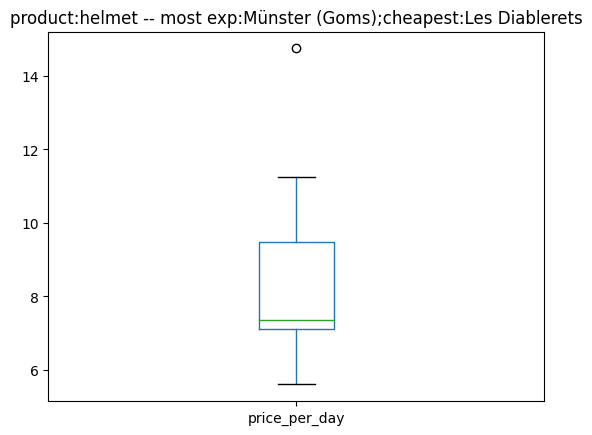

In [32]:
product = "helmet"
df_selection = df[['location_town', 'price_per_day']][df['gear_name'].str.lower() == product]
df_prices = df_selection.groupby('location_town')['price_per_day'].mean().reset_index()
most_expensive = df_prices.loc[df_prices['price_per_day'].idxmax()].location_town
cheapest = df_prices.loc[df_prices['price_per_day'].idxmin()].location_town

df_prices.boxplot(column='price_per_day', grid=False).set_title(f"product:{product} -- most exp:{most_expensive};cheapest:{cheapest}")


In [20]:
df.head(3)

,location_key,first_rental_day,return_date,gear_name,price,rental_duration,price_per_day,gear_class
0,Grimentz,2023-12-15,2023-12-15,Ski Exclusive,49.5,1.0,49.5,ski
1,Grimentz,2023-12-15,2023-12-15,Ski Exclusive,49.5,1.0,49.5,ski
2,Grimentz,2023-12-15,2023-12-15,Ski Exclusive,49.5,1.0,49.5,ski


In [21]:
df['gear_class'].value_counts().reset_index()

,gear_class,count
0,ski,9591
1,clothes,9486
2,snowboard,3858
3,helmet,2162
4,set,1813
5,sledge,715
6,other,474
7,services,150


In [23]:
df.groupby('location_key')['gear_class'].nunique().reset_index(name='distinct_gear_class_count').sort_values(by='distinct_gear_class_count', ascending=False)



,location_key,distinct_gear_class_count
76,Le Sentier,7
134,Scuol,7
159,Villars-sur-Ollon,6
154,Vals,6
104,Oberwil i.S.,6
...,...,...
30,Champex-Lac,0
31,Champéry,0
32,Charmey,0
70,La Forclaz VS,0
